In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def plot(x, y, title, y_label, color):
    plt.figure(figsize=(12, 6))
    plt.xticks(x)
    plt.grid(True)
    plt.title(title)
    plt.scatter(x, y=y)
    plt.xlabel("Liczba procesów")
    plt.ylabel(y_label)
    plt.show()

In [17]:
def efficiency_plot(data):
    t_1 = data['time'].iloc[0]
    size = data['problem'].iloc[0]
    method = data['method'].iloc[0]
    epsilon = 1e-5
    efficiency = data.apply(lambda x: t_1 / (x.time *x.proc) ,axis=1)
    plot(
        x=data['proc'],
        y=efficiency,
        title="Efektywność dla algorytmu {}, rozmiar macierzy {}x{}, epsilon {} ".format(alg,size,size,epsilon),
        y_label="Efektywność",
        color="blue",
    )

In [18]:
def speedup_plot(data):
    t_1 = data['time'].iloc[0]
    size = data['problem'].iloc[0]
    method = data['method'].iloc[0]
    epsilon = 1e-5
    speedup =  data.apply(lambda x: t_1 / x.time  ,axis=1)
        
    plot(
        x=data['proc'],
        y=speedup,
        title="Przyśpieszenie dla algorytmu {}, rozmiar macierzy {}x{}, {} ".format(alg,size,size,epsilon),
        y_label="Przyśpieszenie",
        color="red",
    )

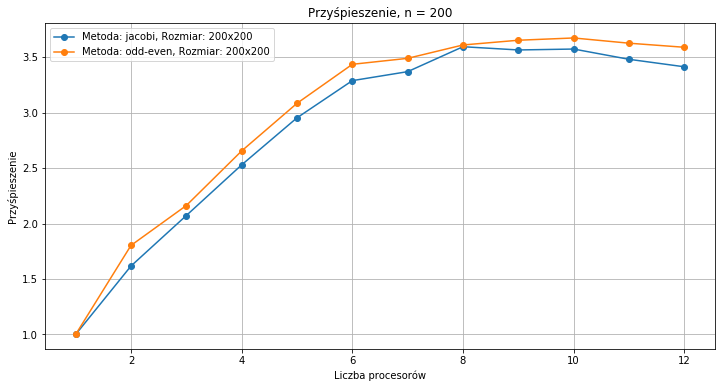

In [7]:
def speedup_plot_all(data):
    size = set(data['problem']).pop()
    methodSet = set(data['method'])
    
    plt.figure(figsize=(12, 6))
    plt.xlabel("Liczba procesorów")
    plt.ylabel("Przyśpieszenie")
    plt.title("Przyśpieszenie, n = " + str(size))
    plt.grid(True)
    
    for method in methodSet:
        data_methoded = data.loc[data['method'] == method]
        
        t_1 = data_methoded['time'].iloc[0]
        size = data_methoded['problem'].iloc[0]
        speedup = data_methoded.apply(lambda x: t_1 / x.time  ,axis=1)
        x = data_methoded['tasks']
        y = speedup
        plt.plot( x, y, marker='o', label="Metoda: {}, Rozmiar: {}x{}".format(method, size, size))

    plt.legend(loc='best')
    
shared_mem = pd.read_csv("shared-mem.csv")
shared_mem_200 = shared_mem.loc[shared_mem['problem'] == 200]
speedup_plot_all(shared_mem_200)

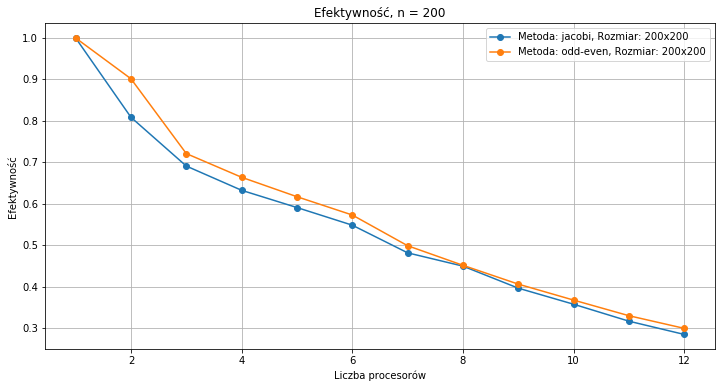

In [9]:
def efficiency_plot_all(data):
    size = set(data['problem']).pop()
    methodSet = set(data['method'])
    
    plt.figure(figsize=(12, 6))
    plt.xlabel("Liczba procesorów")
    plt.ylabel("Efektywność")
    plt.title("Efektywność, n = {}".format(size))
    plt.grid(True)
    
    for method in methodSet:
        data_methoded = data.loc[data['method'] == method]
        t_1 = data_methoded['time'].iloc[0]
        size = data_methoded['problem'].iloc[0]
        efficiency = data_methoded.apply(lambda x: t_1 / (x.time *x.tasks) ,axis=1)
        x = data_methoded['tasks']
        y = efficiency
        plt.plot( x, y, marker='o', label="Metoda: {}, Rozmiar: {}x{}".format(method, size, size))
    plt.legend(loc='best')
    
shared_mem = pd.read_csv("shared-mem.csv")
shared_mem_200 = shared_mem.loc[shared_mem['problem'] == 200]
efficiency_plot_all(shared_mem_200)

# Pamięć wspólna

In [20]:
shared_mem = pd.read_csv("shared-mem.csv")

In [21]:
jacobi_shared_mem = shared_mem.loc[shared_mem['method'] == "jacobi"]
jacobi_shared_mem.head()

,method,tasks,locales,time,epsilon,problem
1,jacobi,1,1,239.8390,0.00001,100
3,jacobi,2,1,148.3110,0.00001,100
5,jacobi,3,1,115.7120,0.00001,100
7,jacobi,4,1,94.8154,0.00001,100
9,jacobi,5,1,81.1937,0.00001,100


In [22]:
odd_even_shared_mem = shared_mem.loc[shared_mem['alg'] == "odd-even"]
odd_even_shared_mem.head()

KeyError: 'alg'

In [23]:
speedup_plot(jacobi_shared_mem)
speedup_plot(odd_even_shared_mem)

KeyError: 'proc'

In [24]:
efficiency_plot(jacobi_shared_mem)
efficiency_plot(odd_even_shared_mem)

AttributeError: ("'Series' object has no attribute 'proc'", 'occurred at index 1')

# Pamięć rozproszona

In [11]:
dist_mem = pd.read_csv("dist-mem.csv")

In [14]:
jacobi_dist_mem = dist_mem.loc[dist_mem['alg'] == "jacobi"]
jacobi_dist_mem.head()

,alg,proc,n_nodes,time,epsilon,size
1,jacobi,1,1,1268.530,0.00001,100
3,jacobi,2,2,720.821,0.00001,100
5,jacobi,3,3,543.961,0.00001,100
7,jacobi,4,4,558.322,0.00001,100
9,jacobi,5,5,975.341,0.00001,100


In [15]:
odd_even_dist_mem = dist_mem.loc[dist_mem['alg'] == "odd-even"]
odd_even_dist_mem.head()

,alg,proc,n_nodes,time,epsilon,size
0,odd-even,1,1,173.3590,0.00001,100
2,odd-even,2,2,94.8092,0.00001,100
4,odd-even,3,3,76.2239,0.00001,100
6,odd-even,4,4,79.5725,0.00001,100
8,odd-even,5,5,150.2590,0.00001,100


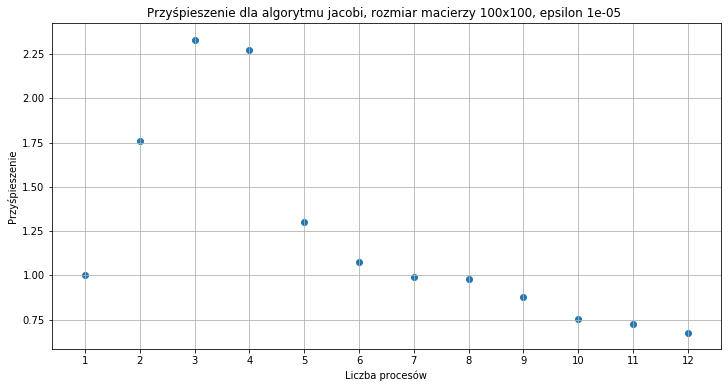

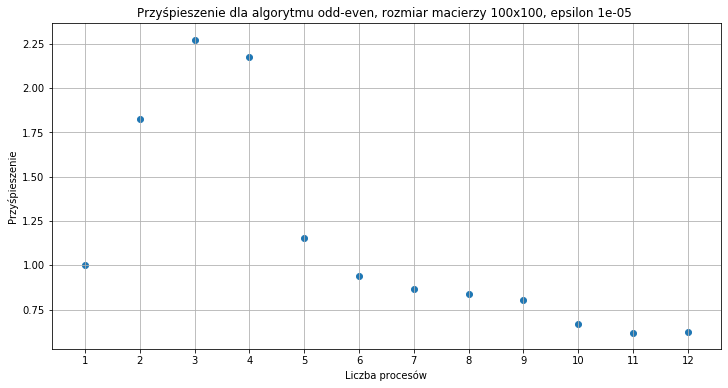

In [16]:
speedup_plot(jacobi_dist_mem)
speedup_plot(odd_even_dist_mem)

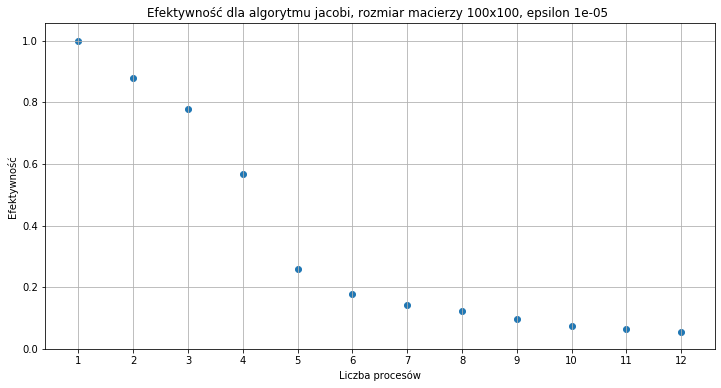

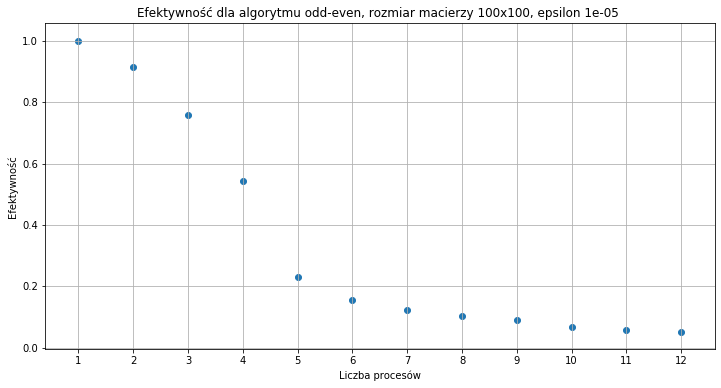

In [17]:
efficiency_plot(jacobi_dist_mem)
efficiency_plot(odd_even_dist_mem)